In [1]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [2]:
# Import Necessary Libraries
# These are commonly used for data manipulation and visualization, and for implementing machine learning algorithms.

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
# Load a CSV file named 'Basic Data for ML' into a DataFrame 'df_UC' and display it

df_UC = pd.read_csv('Basic Data for ML.csv')
df_UC

,Company,Valuation ($B),Date Achieved Unicorn Status,Country,City,Industry,Select Investors,Founded Year,Detailed Industry,Investors Count,Total Raised ($B),Valuation Over Funding ($B),Age of Company,Years Achieved Unicorn Status,Valuation Growth Rate (Yearly)
0,Deel,12.00,2021,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, Spark Capital, Y Combinator",2018,Fintech,13,2.70100,9.29900,5,3,1.859800
1,Bolt,11.00,2021,United States,San Francisco,Financial Services,"Activant Capital, Tribe Capital, General Atlantic",2014,Fintech,37,0.96300,10.03700,9,7,1.115222
2,Alchemy,10.20,2021,United States,San Francisco,Enterprise Tech,"DFJ Growth Fund, Coatue Management, Addition",2017,Fintech,27,0.54500,9.65500,6,4,1.609167
3,6Sense,5.20,2021,United States,San Francisco,Enterprise Tech,"Venrock, Battery Ventures, Insight Partners",2013,Artificial intelligence,25,1.07700,4.12300,10,8,0.412300
4,Cerebral,4.80,2021,United States,San Francisco,Healthcare & Life Sciences,"Oak HC/FT Partners, Artis Ventures, WestCap Group",2020,Health,26,1.06100,3.73900,3,1,1.246333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Acko General Insurance,1.10,2021,India,Singapore,Insurance,"Intact Ventures, Munich Re Ventures, General A...",2016,Fintech,8,0.15160,0.94840,7,5,0.135486
724,The Bank of London,1.10,2021,United Kingdom,Singapore,Financial Services,"Mangrove Capital Partners,14W. ForgeLight",2018,Fintech,22,0.42800,0.67200,5,3,0.134400
725,GlobalBees,1.10,2021,India,New Delhi,Consumer & Retail,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021,E-commerce & direct-to-consumer,34,0.55350,0.54650,2,1,0.273250
726,Mamaearth,1.07,2021,India,Gurgaon,Consumer & Retail,"Fireside Ventures, Sequoia Capital India, Stel...",2016,E-commerce & direct-to-consumer,1,0.20011,0.86989,7,5,0.124270


In our K-means clustering analysis, we have chosen to focus on three key variables: Valuation, Total Raised, and Age of Company. These variables are critical in understanding the financial stature and growth stage of companies in our dataset, making them ideal for identifying distinct clusters based on company size, funding, and maturity.

In [31]:
# Extract specific columns: 'Valuation ($B)', 'Total Raised ($B)', and 'Age of Company' from df_UC into a new DataFrame df_UC_ML, and display it

df_UC_ML = df_UC.loc[:,['Valuation ($B)', 'Total Raised ($B)', 'Age of Company']]
df_UC_ML

,Valuation ($B),Total Raised ($B),Age of Company
0,12.00,2.70100,5
1,11.00,0.96300,9
2,10.20,0.54500,6
3,5.20,1.07700,10
4,4.80,1.06100,3
...,...,...,...
723,1.10,0.15160,7
724,1.10,0.42800,5
725,1.10,0.55350,2
726,1.07,0.20011,7


In [32]:
# Generate descriptive statistics for the 'df_UC_ML' DataFrame

df_UC_ML.describe()

,Valuation ($B),Total Raised ($B),Age of Company
count,728.000000,728.000000,728.000000
mean,3.637349,0.628312,10.149725
std,4.898845,0.743667,4.729939
min,1.000000,0.001000,2.000000
25%,1.437500,0.262440,7.000000
50%,2.100000,0.427005,9.000000
75%,4.000000,0.709047,12.000000
max,66.000000,6.255000,33.000000


<Axes: xlabel='Total Raised ($B)', ylabel='Valuation ($B)'>

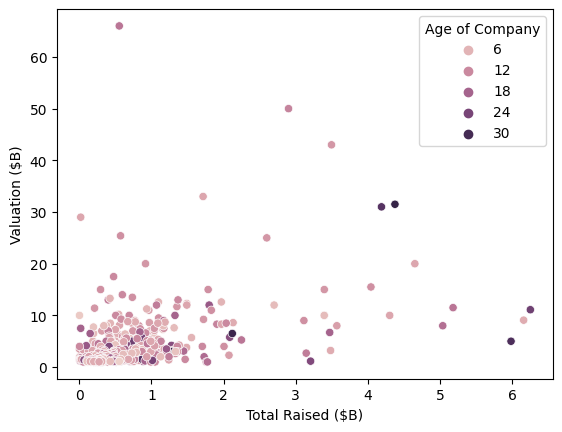

In [33]:
# Create a scatter plot using Seaborn: 'Total Raised ($B)' vs. 'Valuation ($B)', colored by 'Age of Company' in df_UC_ML
# This visualization helps in understanding the relationship between these variables and how they are influenced by the age of the company.

sns.scatterplot(data = df_UC_ML, x = 'Total Raised ($B)', y = 'Valuation ($B)', hue = 'Age of Company')

In [34]:
# Normalize the df_UC_ML DataFrame using StandardScaler, convert it to a DataFrame, and display the first 5 rows

ss=StandardScaler().fit_transform(df_UC_ML)
df_UC_ML_std = pd.DataFrame(ss)
df_UC_ML_std.head()

,0,1,2
0,1.708240,2.789036,-1.089499
1,1.503970,0.450360,-0.243241
2,1.340553,-0.112106,-0.877935
3,0.319203,0.603760,-0.031677
4,0.237495,0.582230,-1.512629


In [35]:
# Generate descriptive statistics for the normalized DataFrame 'df_UC_ML_std'

df_UC_ML_std.describe()

,0,1,2
count,7.280000e+02,7.280000e+02,7.280000e+02
mean,1.122423e-16,-9.760202e-17,-1.610433e-16
std,1.000688e+00,1.000688e+00,1.000688e+00
min,-5.387315e-01,-8.441194e-01,-1.724193e+00
25%,-4.493634e-01,-4.923223e-01,-6.663703e-01
50%,-3.140344e-01,-2.708815e-01,-2.432411e-01
75%,7.407878e-02,1.086386e-01,3.914526e-01
max,1.273883e+01,7.571345e+00,4.834308e+00


<Axes: >

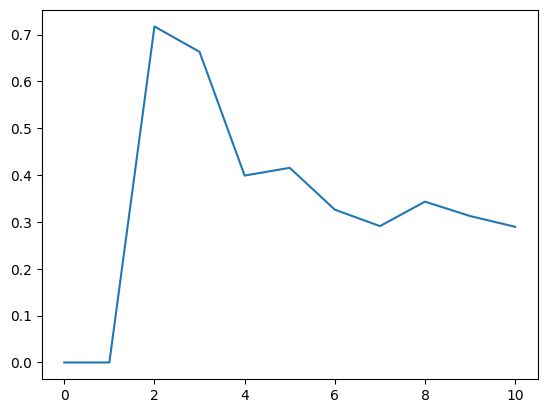

In [41]:
# Declaring lists to store the information within the loop
fits = [0,0] # Initialising for k=0&1
scores = [0,0] # Initialising for k=0&1
for k in range(2,11): # this will start with 2 & go up to 10 - might take some time...
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, n_init='auto').fit(df_UC_ML_std)
    # append the model to fits
    fits.append(model)
    # Append the silhouette score to scores
    scores.append(silhouette_score(df_UC_ML_std, model.labels_, metric='euclidean'))
# Plot the scores for each value of k
sns.lineplot(x = range(0,11), y = scores)


# The code is primarily used for finding the optimal number of clusters in K-means clustering by analyzing the silhouette scores for different values of k.
# The silhouette score helps in understanding the quality of the clustering process.
# A higher silhouette score indicates better-defined clusters.

In [45]:
# Count and display the number of data points in each cluster for the K-means model with k=3

pd.Series(fits[3].labels_).value_counts()

0    689
2     30
1      9
dtype: int64

In [47]:
# Calculate and display the silhouette score for the K-means model with k=3 using Euclidean distance

silhouette_score(df_UC_ML_std, fits[3].labels_, metric='euclidean')

0.6631614273453483

<Axes: ylabel='Valuation ($B)'>

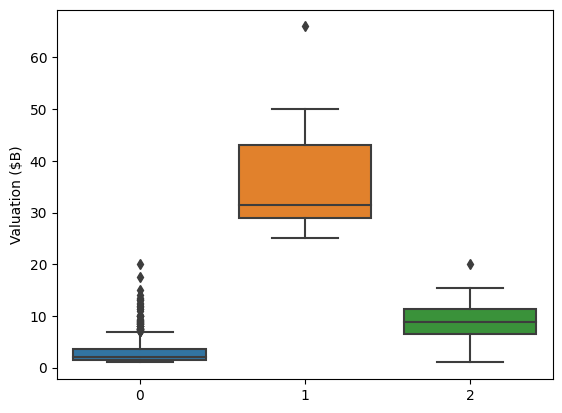

In [49]:
# Create a boxplot showing the distribution of 'Valuation ($B)' across clusters labeled by the K-means model with k=3

sns.boxplot(x = fits[3].labels_, y = df_UC['Valuation ($B)'])

<Axes: ylabel='Total Raised ($B)'>

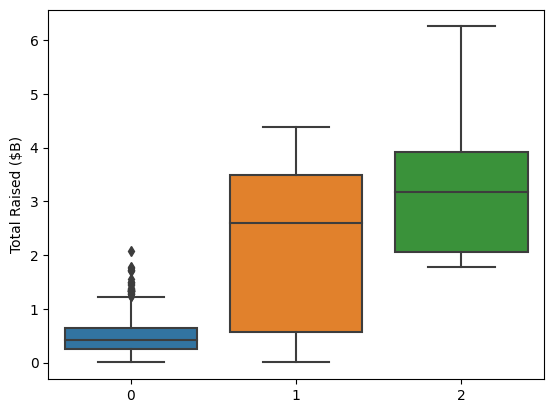

In [52]:
# Generate a boxplot to visualize the distribution of 'Total Raised ($B)' for each cluster in the K-means model with k=3

sns.boxplot(x = fits[3].labels_, y = df_UC['Total Raised ($B)'])

<Axes: ylabel='Age of Company'>

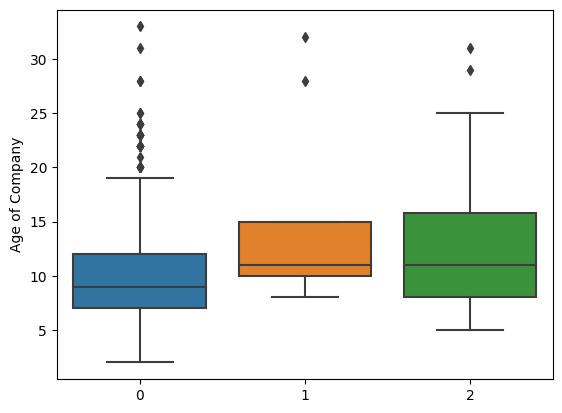

In [54]:
# Display a boxplot of 'Age of Company' across the clusters defined by the K-means model with k=3

sns.boxplot(x = fits[3].labels_, y = df_UC['Age of Company'])

<Axes: ylabel='Years Achieved Unicorn Status'>

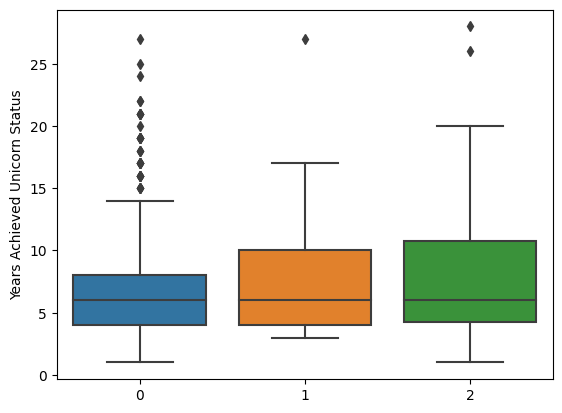

In [56]:
# Display a boxplot of 'Years Achieved Unicorn Status' across the clusters defined by the K-means model with k=3

sns.boxplot(x = fits[3].labels_, y = df_UC['Years Achieved Unicorn Status'])

<Axes: ylabel='Valuation Growth Rate (Yearly)'>

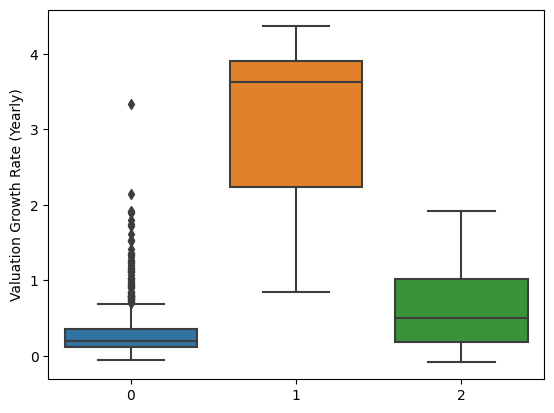

In [58]:
# Display a boxplot of 'Valuation Growth Rate (Yearly)' across the clusters defined by the K-means model with k=3

sns.boxplot(x = fits[3].labels_, y = df_UC['Valuation Growth Rate (Yearly)'])

In [59]:
# Assign the cluster labels from the K-means model with k=3 to 'df_UC' as a new column 'cluster_3', and display the DataFrame

df_UC['cluster_3']=fits[3].labels_
df_UC

,Company,Valuation ($B),Date Achieved Unicorn Status,Country,City,Industry,Select Investors,Founded Year,Detailed Industry,Investors Count,Total Raised ($B),Valuation Over Funding ($B),Age of Company,Years Achieved Unicorn Status,Valuation Growth Rate (Yearly),cluster_3
0,Deel,12.00,2021,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, Spark Capital, Y Combinator",2018,Fintech,13,2.70100,9.29900,5,3,1.859800,2
1,Bolt,11.00,2021,United States,San Francisco,Financial Services,"Activant Capital, Tribe Capital, General Atlantic",2014,Fintech,37,0.96300,10.03700,9,7,1.115222,0
2,Alchemy,10.20,2021,United States,San Francisco,Enterprise Tech,"DFJ Growth Fund, Coatue Management, Addition",2017,Fintech,27,0.54500,9.65500,6,4,1.609167,0
3,6Sense,5.20,2021,United States,San Francisco,Enterprise Tech,"Venrock, Battery Ventures, Insight Partners",2013,Artificial intelligence,25,1.07700,4.12300,10,8,0.412300,0
4,Cerebral,4.80,2021,United States,San Francisco,Healthcare & Life Sciences,"Oak HC/FT Partners, Artis Ventures, WestCap Group",2020,Health,26,1.06100,3.73900,3,1,1.246333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,Acko General Insurance,1.10,2021,India,Singapore,Insurance,"Intact Ventures, Munich Re Ventures, General A...",2016,Fintech,8,0.15160,0.94840,7,5,0.135486,0
724,The Bank of London,1.10,2021,United Kingdom,Singapore,Financial Services,"Mangrove Capital Partners,14W. ForgeLight",2018,Fintech,22,0.42800,0.67200,5,3,0.134400,0
725,GlobalBees,1.10,2021,India,New Delhi,Consumer & Retail,"Chiratae Ventures, SoftBank Group, Trifecta Ca...",2021,E-commerce & direct-to-consumer,34,0.55350,0.54650,2,1,0.273250,0
726,Mamaearth,1.07,2021,India,Gurgaon,Consumer & Retail,"Fireside Ventures, Sequoia Capital India, Stel...",2016,E-commerce & direct-to-consumer,1,0.20011,0.86989,7,5,0.124270,0


In [61]:
# Save the DataFrame 'df_UC' to a CSV file named 'Dataset with 3 Clusters.csv'

df_UC.to_csv(r'Dataset with 3 Clusters.csv')